In [28]:
# Dependencies
import numpy as np
import pandas as pd
import json
import datetime as dt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

import matplotlib.pyplot as plt

In [29]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [30]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [31]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 

june_temps = session.query(Measurement.date,Measurement.tobs).filter(extract('month',Measurement.date) == 6).all()
df=pd.DataFrame(june_temps,columns=['date','temp'])
df

,date,temp
0,2010-06-01,78.0
1,2010-06-02,76.0
2,2010-06-03,78.0
3,2010-06-04,76.0
4,2010-06-05,77.0
...,...,...
1695,2017-06-26,79.0
1696,2017-06-27,74.0
1697,2017-06-28,74.0
1698,2017-06-29,76.0


In [32]:
#  3. Convert the June temperatures to a list.
june_temp_list = df['temp']
june_temp_list

0       78.0
1       76.0
2       78.0
3       76.0
4       77.0
        ... 
1695    79.0
1696    74.0
1697    74.0
1698    76.0
1699    75.0
Name: temp, Length: 1700, dtype: float64

In [33]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_temp_df = df
june_temp_df

,date,temp
0,2010-06-01,78.0
1,2010-06-02,76.0
2,2010-06-03,78.0
3,2010-06-04,76.0
4,2010-06-05,77.0
...,...,...
1695,2017-06-26,79.0
1696,2017-06-27,74.0
1697,2017-06-28,74.0
1698,2017-06-29,76.0


In [34]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temp_df.describe()

,temp
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [35]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_temps = session.query(Measurement.date,Measurement.tobs).filter(extract('month',Measurement.date) == 12).all()

In [36]:
# 7. Convert the December temperatures to a list.
dec_temp_list = print(dec_temps)

, ('2010-12-08', 67.0), ('2010-12-09', 76.0), ('2010-12-10', 68.0), ('2010-12-13', 69.0), ('2010-12-14', 71.0), ('2010-12-15', 70.0), ('2010-12-16', 68.0), ('2010-12-17', 66.0), ('2011-12-01', 69.0), ('2011-12-02', 69.0), ('2011-12-05', 71.0), ('2011-12-06', 72.0), ('2011-12-07', 69.0), ('2011-12-08', 72.0), ('2011-12-09', 70.0), ('2011-12-12', 76.0), ('2011-12-13', 69.0), ('2011-12-14', 71.0), ('2011-12-15', 72.0), ('2011-12-16', 71.0), ('2012-12-03', 78.0), ('2012-12-04', 73.0), ('2012-12-05', 74.0), ('2012-12-06', 68.0), ('2012-12-07', 71.0), ('2012-12-10', 76.0), ('2012-12-11', 75.0), ('2012-12-12', 74.0), ('2012-12-13', 73.0), ('2012-12-14', 73.0), ('2012-12-27', 74.0), ('2012-12-28', 69.0), ('2013-12-02', 74.0), ('2013-12-03', 72.0), ('2013-12-04', 70.0), ('2013-12-05', 67.0), ('2013-12-06', 69.0), ('2013-12-09', 73.0), ('2013-12-10', 75.0), ('2013-12-11', 74.0), ('2013-12-12', 72.0), ('2013-12-13', 71.0), ('2013-12-16', 67.0), ('2013-12-17', 74.0), ('2013-12-18', 70.0), ('2013-1

In [37]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temp_df=pd.DataFrame(dec_temps,columns=['date','temp'])
dec_temp_df


,date,temp
0,2010-12-01,76.0
1,2010-12-03,74.0
2,2010-12-04,74.0
3,2010-12-06,64.0
4,2010-12-07,64.0
...,...,...
1512,2016-12-27,71.0
1513,2016-12-28,71.0
1514,2016-12-29,69.0
1515,2016-12-30,65.0


In [38]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_temp_df.describe()

,temp
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


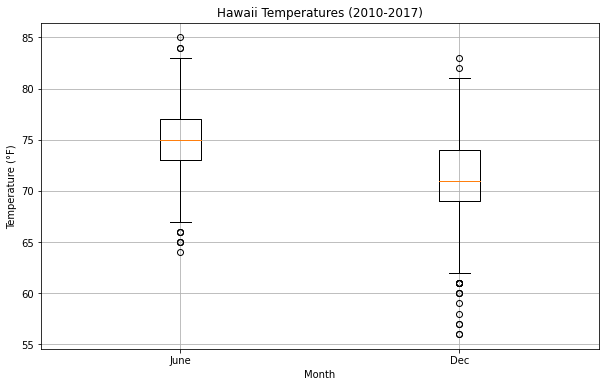

In [39]:
plt_data = [june_temp_df['temp'],dec_temp_df['temp']]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Hawaii Temperatures (2010-2017)')
ax.set_ylabel('Temperature (°F)')
ax.set_xlabel("Month")
ax.boxplot(plt_data, labels=['June','Dec'])
ax.grid()
plt.savefig("boxplot.png")
plt.show()